In [1]:
# Input the DB to Memory
import pandas as pd
import numpy as np
print("Loading DB...")
data_file = pd.ExcelFile("globalterrorismdb_0616dist.xlsx")
#data_file = pd.ExcelFile("test_data.xlsx")
print("DB Read...")
print(data_file.sheet_names)
dfs = data_file.parse(data_file.sheet_names[0])
print("DB Parsed...")

Loading DB...
DB Read...
['Data']
DB Parsed...


In [2]:
# General Information regarding the DB
columns = dfs.columns
total_entries = len(dfs)
print("Total attributes:" + str(len(columns)))
print("Total entries:"+ str(total_entries))
#for years in dfs[columns[1]]:
#    print(years)
#print(dfs[columns[1]])
#unique_years, year_counts = np.unique(dfs[columns[1]], return_counts=True)
#print(unique_years)
#print(year_counts)

Total attributes:137
Total entries:156772


Missing year: 1993
Length matches.
Sum of year frequencies = Number of total entries


<IPython.core.display.Javascript object>


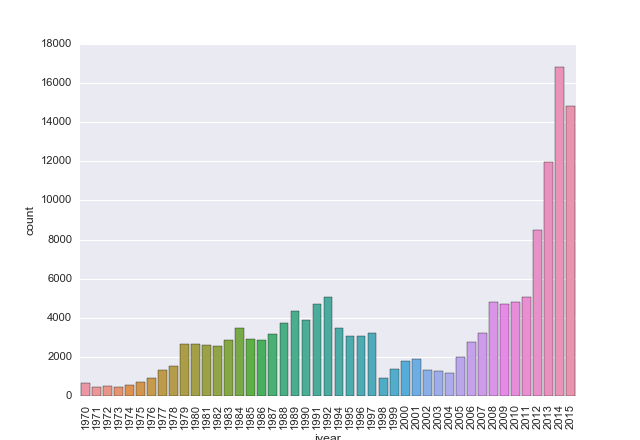

In [3]:
# Start with Column 1. Describes the year of the event. Ignoring column 0 as it's just a unique ID. 
# Maybe useful later to create dictionaries.
# Histogram shows the number of incidents per year
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
unique_years, year_counts = np.unique(dfs[columns[1]], return_counts=True)
count = 0
# Check if any year is missing from the data
for i in range(unique_years[0],unique_years[len(unique_years)-1]):
    if i != unique_years[i-1970-count]:
        print("Missing year: " + str(i))
        count = count+1
# Check if any row is missing a year
if total_entries == len(dfs[columns[1]]):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(year_counts)
if total_entries == total:
    print("Sum of year frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(dfs[columns[1]])
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[   23 12878 11824 13138 13090 14423 13107 14117 13644 12200 13591 12968
 11769]
For some incidents we do not know the exact date or month :(). We can choose to ignore this data.
Length matches.
Sum of month  frequencies = Number of total entries


<IPython.core.display.Javascript object>


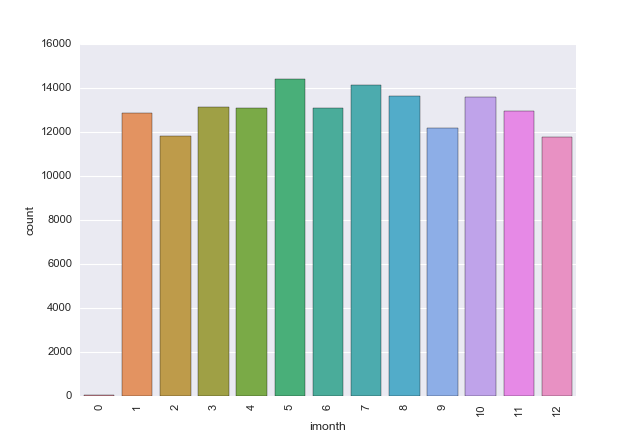

In [4]:
# Start with Column 2. Month of attack.
# Histogram shows the number of incidents per month, over all years
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
unique_months, month_counts = np.unique(dfs[columns[2]], return_counts=True)
print(unique_months)
print(month_counts)

print("For some incidents we do not know the exact date or month :(). We can choose to ignore this data.")
# Check if any month is missing in the data
for i in range(0,12):
    if i not in unique_months:
        print("Missing month: " + str(i))
# Check if any row is missing a year
if total_entries == len(dfs[columns[2]]):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(month_counts)
if total_entries == total:
    print("Sum of month  frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(dfs[columns[2]])
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
[ 894 5540 5193 5202 5334 5005 4956 5150 5043 5247 5294 5155 5171 5246 5251
 5571 5319 5107 5036 5133 5132 4894 5037 4981 4944 5021 5021 5109 5164 4700
 4308 2614]
For some incidents we do not know the exact date or month :(). We can choose to ignore this data.
Length matches.
Sum of day frequencies = Number of total entries


<IPython.core.display.Javascript object>


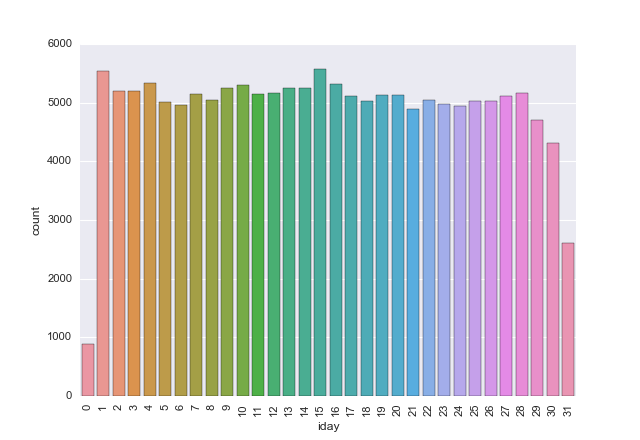

In [5]:
# Start with Column 3. Date of attack.
# Histogram shows the number of incidents per day, over all years
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[3]]
unique_days, day_counts = np.unique(curr_column, return_counts=True)
print(unique_days)
print(day_counts)

print("For some incidents we do not know the exact date or month :(). We can choose to ignore this data.")
# Check if any day is missing in the data
for i in range(0,31):
    if i not in unique_days:
        print("Missing day: " + str(i))
# Check if any row is missing a year
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(day_counts)
if total_entries == total:
    print("Sum of day frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(curr_column)
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

In [4]:
# Start with Column 4. Approx date. Doesn't seem too important. 
# This needs to be cleaned. Some dates are 0, some months are 0, but most have proper dates in the date field.
curr_column = dfs[columns[4]]
sec_column = dfs[columns[2]]
third_column = dfs[columns[3]]
exact_date_count = 0
require_approx_date_count = 0
for index, approx_date in enumerate(curr_column):
    if str(approx_date) == "nan":
        exact_date_count += 1
    else:
        #print("Approx date: " + str(approx_date) + " Actual Date: " + str(sec_column[index]) + "/" 
            #+ str(third_column[index]) + "/")
        if sec_column[index] == 0 or third_column[index] == 0:
            require_approx_date_count += 1
print("Approx date row count = " + str(total_entries - exact_date_count) + " Cases where we don't know date OR month = "
     + str(require_approx_date_count))

Approx date row count = 4756 Cases where we don't know date OR month = 265


Number of extended events = 6482 Number of missing resolutions = 3004


<IPython.core.display.Javascript object>


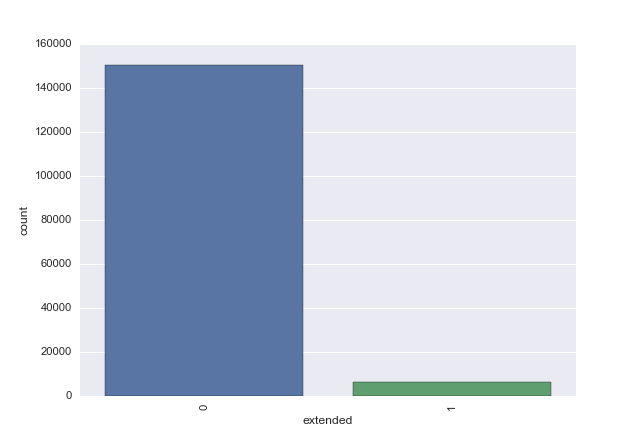

In [6]:
# Start with Column 5 and 6. IsExtendedEvent. ResolutionDate  
# These can be used together to find the duration of events with lasted more than 1 day
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[5]]
sec_column = dfs[columns[6]]
num_extended_events = 0
num_missing_resolutions = 0
for index, is_extended in enumerate(curr_column):
        if is_extended == 1:
            #print(sec_column[index])
            if str(sec_column[index]) == "nan":
                #print("Error. Extended event does not have a resolution date. Index = " + str(index))
                num_missing_resolutions += 1
        num_extended_events += is_extended
print("Number of extended events = " + str(num_extended_events) + " Number of missing resolutions = " + str(num_missing_resolutions))

ax = sns.countplot(curr_column)
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

In [8]:
# Start with Column 7. Country Code These codes are also used for the target/victim nationality fields.
# We should create a dict from the codebook. Some countries only have victims, and can be added manually.
curr_column = dfs[columns[7]]

unique_countries, country_counts = np.unique(curr_column, return_counts=True)
number_of_countries_code = len(unique_countries)

#Check if any row is missing the country name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(country_counts)
if total_entries == total:
    print("Sum of country frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

Length matches.
Sum of country frequencies = Number of total entries


Number of Unique countries: 206
Number of country codes matches number of country txt
Length matches.
Sum of year frequencies = Number of total entries


<IPython.core.display.Javascript object>


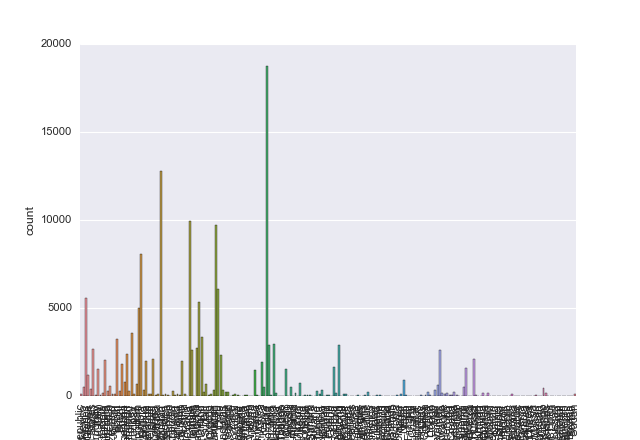

In [9]:
# Start with Column 8. Country Text.
# Histogram shows the number of incidents per country, over all years
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[8]]

unique_countries, country_counts = np.unique(curr_column, return_counts=True)
#print(unique_countries)
#print(country_counts)
number_of_countries_txt = len(unique_countries)
print("Number of Unique countries: " + str(number_of_countries_txt))
if number_of_countries_txt == number_of_countries_code:
    print("Number of country codes matches number of country txt")
#Check if any row is missing the country name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(country_counts)
if total_entries == total:
    print("Sum of year frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(curr_column)
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

In [10]:
# Start with Column 9. Region Code. May be redundant due to Region_txt.
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[9]]

unique_regions, region_counts = np.unique(curr_column, return_counts=True)
print(unique_regions)
print(region_counts)
number_of_regions_code = len(unique_regions)
#print("Number of Unique countries: " + str(number_of_countries_code))

#Check if any row is missing the country name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(region_counts)
if total_entries == total:
    print("Sum of region frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
#ax = sns.countplot(curr_column)
#_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 3268 10337 18628   786 10360 37841   538 16020  4892 40422 13434   246]
Length matches.
Sum of region frequencies = Number of total entries


['Australasia & Oceania' 'Central America & Caribbean' 'Central Asia'
 'East Asia' 'Eastern Europe' 'Middle East & North Africa' 'North America'
 'South America' 'South Asia' 'Southeast Asia' 'Sub-Saharan Africa'
 'Western Europe']
[  246 10337   538   786  4892 40422  3268 18628 37841 10360 13434 16020]
Number of region codes matches number of region txt
Length matches.
Sum of region frequencies = Number of total entries


<IPython.core.display.Javascript object>


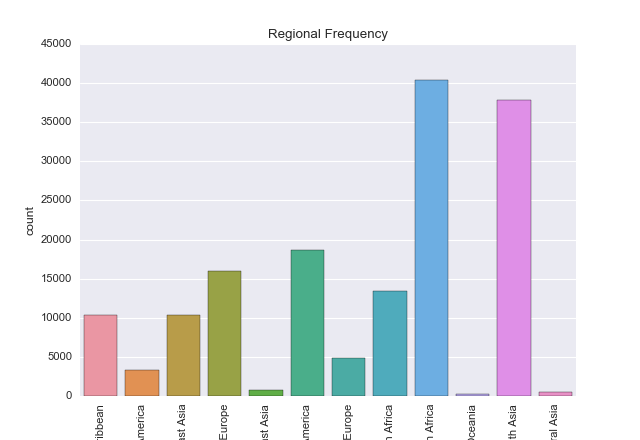

In [11]:
# Start with Column 10. Region Text. 
# Histogram shows number of events in each region over all years.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[10]]

unique_regions, region_counts = np.unique(curr_column, return_counts=True)
print(unique_regions)
print(region_counts)
number_of_regions_txt = len(unique_regions)
#print("Number of Unique countries: " + str(number_of_countries_code))
if number_of_regions_txt == number_of_regions_code:
    print("Number of region codes matches number of region txt")
    
#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(region_counts)
if total_entries == total:
    print("Sum of region frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(curr_column)
mp.pyplot.title("Regional Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

In [10]:
# Start with Column 11. Province/State Name. 
# Histogram probably not the best way to visualize this data. Maybe we can do this for every country.
#%matplotlib notebook
#import seaborn as sns
#import matplotlib as mp
curr_column = dfs[columns[11]]
prov_dict = {}
for index, prov in enumerate(curr_column):
    if str(prov) in prov_dict:
        prov_dict[str(prov)] += 1
    else:
        prov_dict[str(prov)] = 1

#unique_provs, prov_counts = np.unique(curr_column, return_counts=True)
#print(unique_provs)
#print(prov_counts)
print("Number of unique provs: " + str(len(prov_dict)))
#Check if any row is missing the prov name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. Total = " + str(total_entries) + " in this column = " + str(len(curr_column)))
#total = np.sum(prov_counts)
#if total_entries == total:
#    print("Sum of prov frequencies = Number of total entries")
#else:
#    print("Achtung!! Cumulative frequency mismatch.")
print("Empty provs instances = " + str(prov_dict["nan"]) + " Unknown provs instances = " + str(prov_dict["Unknown"])) 
#ax = sns.countplot(curr_column)
#_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

Number of unique provs: 2510
Length matches.
Empty provs instances = 14520 Unknown provs instances = 3128


In [11]:
# Start with Column 12. City. 
# Histogram probably not the best way to visualize this data. Maybe we can do this for every country.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[12]]
city_dict = {}
for index, city in enumerate(curr_column):
    if str(city) in city_dict:
        city_dict[str(city)] += 1
    else:
        city_dict[str(city)] = 1

print("Number of unique cities: " + str(len(city_dict)))
#unique_cities, city_counts = np.unique(curr_column, return_counts=True)
#print(unique_provs)
#print(prov_counts)

#Check if any row is missing the prov name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
#total = np.sum(city_counts)
#if total_entries == total:
#    print("Sum of city frequencies = Number of total entries")
#else:
#    print("Achtung!! Cumulative frequency mismatch.")
print("Empty cities = " + str(city_dict["nan"]) + " Unknown provs instances = " + str(city_dict["Unknown"])) 
#ax = sns.countplot(curr_column)
#_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

Number of unique cities: 31325
Length matches.
Empty cities = 446 Unknown provs instances = 8728


In [33]:
# Start with Column 13,14. Lat & Long. 
# Histogram probably not the best way to visualize this data. Maybe we can do this for every country.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[13]]
sec_column = dfs[columns[14]]
empty_count_lat_long = 0
unknown_count_lat_long = 0
for index, lat in enumerate(curr_column):
    if str(lat) == "nan" and str(sec_column[index]) == "nan":
        empty_count_lat_long += 1
    elif isinstance(lat, float) and isinstance(sec_column[index],float):
        continue
    else:
        print("One of lat or long is missing at index : " + str(index))
#unique_cities, city_counts = np.unique(curr_column, return_counts=True)
#print(unique_provs)
#print(prov_counts)

#Check if any row is missing the prov name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
#total = np.sum(city_counts)
#if total_entries == total:
#    print("Sum of city frequencies = Number of total entries")
#else:
#    print("Achtung!! Cumulative frequency mismatch.")
print("Empty lats + longs = " + str(empty_count_lat_long)) 
#ax = sns.countplot(curr_column)
#_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

Length matches.
Empty lats + longs = 4519


In [39]:
# Start with Column 12,13,14. City, Lat & Long. Check if City missing and lat long present or vice versa. 
# Histogram probably not the best way to visualize this data. Maybe we can do this for every country.

curr_column = dfs[columns[12]]
sec_column = dfs[columns[13]]
city_missing_count = 0
lat_long_missing_count = 0
no_location_info_count = 0
for index, city in enumerate(curr_column):
    if str(city) == "nan" or str(city) == "Unknown":
        if str(sec_column[index]) == "nan":
            no_location_info_count += 1
        elif isinstance(sec_column[index],float):
            city_missing_count += 1
    elif str(sec_column[index]) == "nan":
        lat_long_missing_count += 1
print("Missing Cities with Lats/Longs = " + str(city_missing_count) + " Missing Lat/Longs with Cities = " 
      + str(lat_long_missing_count) + " Events with no city or Lat/Long = " + str(no_location_info_count))

Missing Cities with Lats/Longs = 7136 Missing Lat/Longs with Cities = 2481 Events with no city or Lat/Long = 2038


[1 2 3 4 5]
[126425   6235  12145   7433   4534]
Length matches.
Sum of specificity frequencies = Number of total entries


<IPython.core.display.Javascript object>


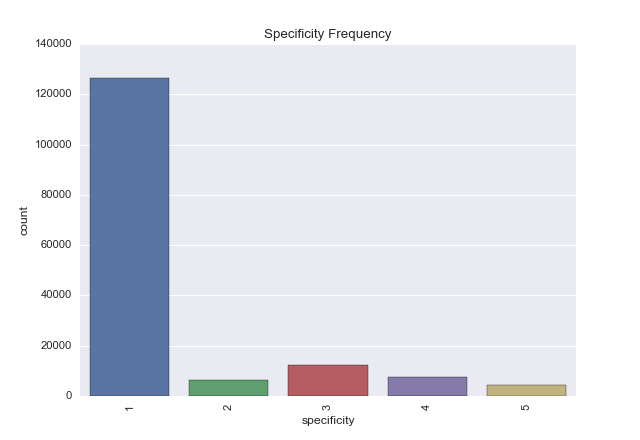

In [42]:
# Start with Column 15. Location Specificity. 1 is geolocation for city/town/village, 5 is Unknown 
# Histogram shows number of events in each region over all years.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[15]]

unique_specificity, specificity_counts = np.unique(curr_column, return_counts=True)
print(unique_specificity)
print(specificity_counts)
number_of_regions_txt = len(unique_regions)
    
#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(specificity_counts)))
total = np.sum(specificity_counts)
if total_entries == total:
    print("Sum of specificity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(curr_column)
mp.pyplot.title("Specificity Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)